In [145]:
import pandas as pd

preproc_file = "processed_data.csv"

df = pd.read_csv(preproc_file, sep=';', engine='python')

#therapy_applied = df.query("TherapyApply == 1")
#therapy_not_applied = df.query("TherapyApply == 0")
df

,CaseID,Gender,Age,Outcome,Vacin,TherapyApply,Результат_F,Результат_D,Severity,Meds,Duration
0,376917,ж,65.0,Выписан,Нет,1,135.9,423.90,Крайне тяжелое,0,67
1,390158,м,73.0,Выписан,Нет,1,1024.5,578.65,Тяжелое,0,45
2,390185,ж,57.0,Умер,Нет,1,606.0,349.60,Крайне тяжелое,0,44
3,390093,ж,66.0,Умер,Нет,1,586.9,486.70,Крайне тяжелое,0,35
4,390165,м,56.0,Выписан,Спутник V,1,1013.0,417.30,Крайне тяжелое,0,41
...,...,...,...,...,...,...,...,...,...,...,...
8493,390228,м,64.0,Умер,Нет,0,1013.0,417.30,Тяжелое,0,0
8494,389763,ж,91.0,Умер,Нет,0,1705.0,900.10,Тяжелое,0,3
8495,389824,ж,84.0,Умер,Нет,0,1734.0,853.60,Тяжелое,0,1
8496,389919,ж,91.0,Умер,Нет,0,754.9,853.60,Тяжелое,0,1


/tmp/ipykernel_8490/391958223.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()


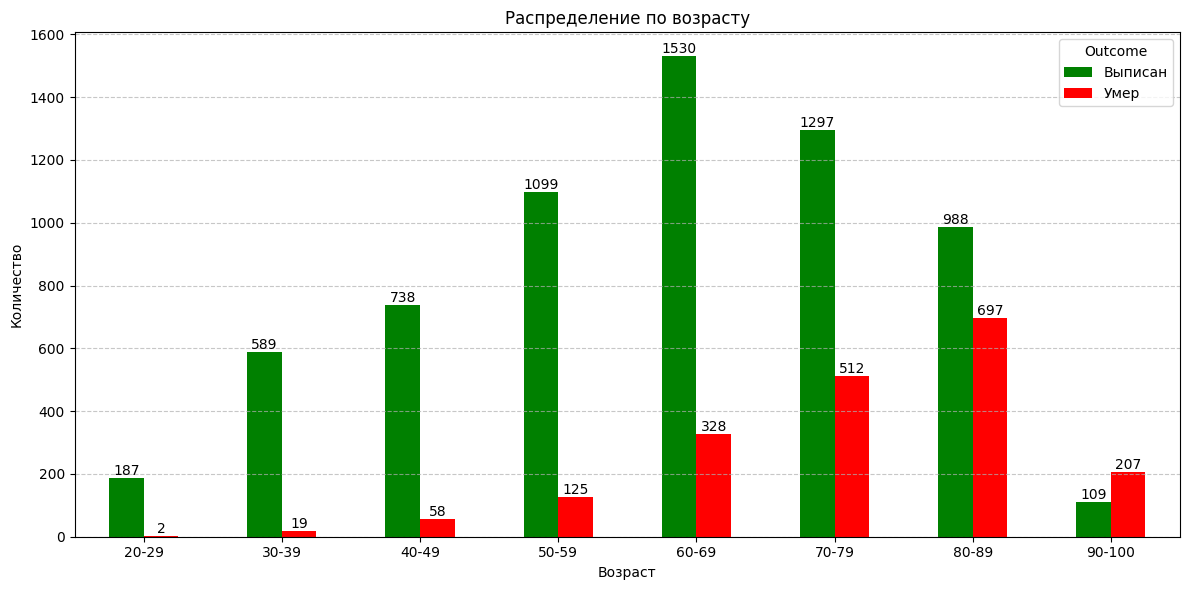

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

grouped = df.groupby(['AgeGroup', 'Outcome']).size().unstack()

ax = grouped.plot(kind='bar', stacked=False, figsize=(12, 6), color=['green', 'red'])
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Outcome')

for p in ax.containers:
    ax.bar_label(p, label_type='edge')

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

age_outcome = df.groupby(['Age', 'Outcome']).size().unstack()

age_outcome.plot(kind='line', marker='o', ax=plt.gca())

plt.xticks([0, 20, 30, 40, 50, 60, 70, 80, 90, 100])

plt.title('Исходы по возрасту')
plt.ylabel('Количество пациентов')
plt.xlabel('Возраст')
plt.grid(True)
plt.show()

Факт вакцинации

Outcome  Выписан  Умер
Vacin                 
Да          1230   197
Нет         5318  1753


<Figure size 1000x600 with 0 Axes>

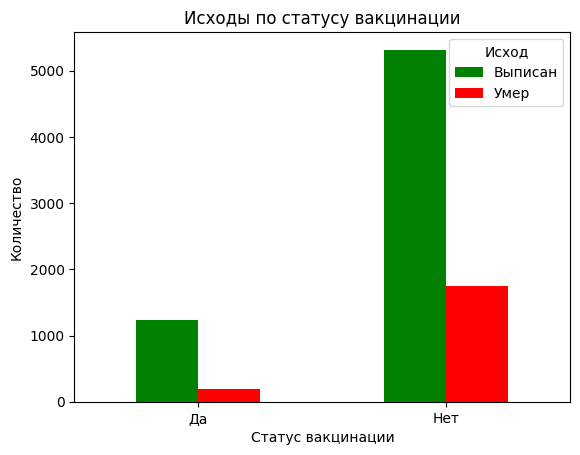

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

types = ['Ковивак', 'Phizer', 'Эпиваккорона', 'Спутник V', 'Спутник Лайт']
for t in types:
    df = df.replace(t, 'Да')

cross_tab = pd.crosstab(df['Vacin'], df['Outcome'])
print(cross_tab)
plt.figure(figsize=(10, 6))
cross_tab.plot(kind='bar', stacked=False, color=['green', 'red'])
plt.title('Исходы по статусу вакцинации')
plt.xlabel('Статус вакцинации')
plt.ylabel('Количество')
plt.legend(title='Исход')
plt.xticks(rotation=0)
plt.show()

Outcome  Выписан  Умер
Vacin                 
Да          1230   197
Нет         5318  1753


<Figure size 1000x600 with 0 Axes>

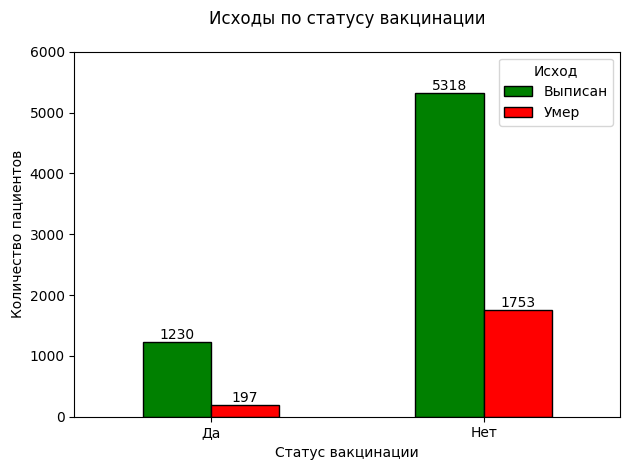

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

types = ['Ковивак', 'Phizer', 'Эпиваккорона', 'Спутник V', 'Спутник Лайт']
for t in types:
    df = df.replace(t, 'Да')

cross_tab = pd.crosstab(df['Vacin'], df['Outcome'])
print(cross_tab)

plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', 
                   stacked=False, 
                   color=['green', 'red'],
                   width=0.5,
                   edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, 
                label_type='edge')
plt.ylim(0, 6000)
plt.title('Исходы по статусу вакцинации', pad = 20)
plt.xlabel('Статус вакцинации')
plt.ylabel('Количество пациентов')
plt.legend(title='Исход')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Пол

Outcome  Выписан  Умер
Gender                
ж           3950  1146
м           2598   804


<Figure size 1000x600 with 0 Axes>

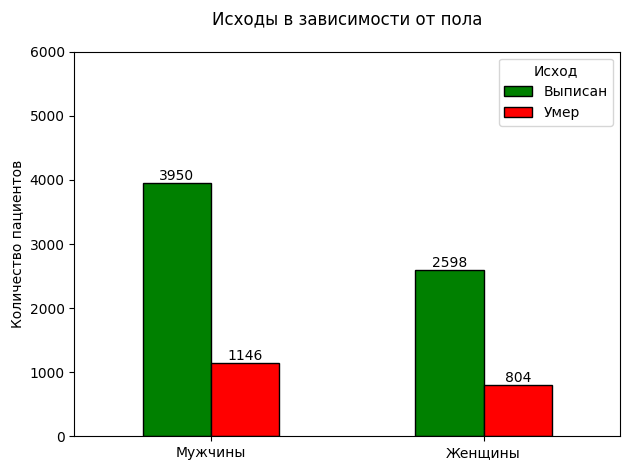

Gender
ж    77.511774
м    76.366843
dtype: float64


In [195]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cross_tab = pd.crosstab(df['Gender'], df['Outcome'])
print(cross_tab)

plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', 
                   stacked=False, 
                   color=['green', 'red'],
                   width=0.5,
                   edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, 
                label_type='edge')
ax.set_xticklabels(['Мужчины', 'Женщины'])
ax.set_xlabel("")
plt.ylim(0, 6000)
plt.title('Исходы в зависимости от пола', pad = 20)
plt.ylabel('Количество пациентов')
plt.legend(title='Исход')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

survival_rate = (cross_tab['Выписан'] / cross_tab.sum(axis=1)) * 100
print(survival_rate)

Тяжесть

In [196]:
print(set(df['Severity']))

{'Среднетяжелое', 'Тяжелое', 'Крайне тяжелое'}


Outcome         Выписан  Умер
Severity                     
Крайне тяжелое       10    94
Среднетяжелое      5787   526
Тяжелое             751  1330


<Figure size 1000x600 with 0 Axes>

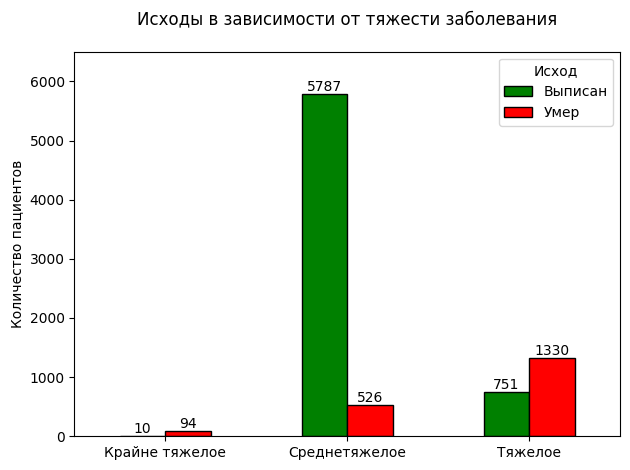

In [200]:
cross_tab = pd.crosstab(df['Severity'], df['Outcome'])
print(cross_tab)

plt.figure(figsize=(10, 6))
ax = cross_tab.plot(kind='bar', 
                   stacked=False, 
                   color=['green', 'red'],
                   width=0.5,
                   edgecolor='black')

for container in ax.containers:
    ax.bar_label(container, 
                label_type='edge')
ax.set_xticklabels(['Крайне тяжелое','Среднетяжелое', 'Тяжелое'])
ax.set_xlabel("")
plt.ylim(0, 6500)
plt.title('Исходы в зависимости от тяжести заболевания', pad = 20)
plt.ylabel('Количество пациентов')
plt.legend(title='Исход')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
